In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
def rosenbrock(x):
    """Função de Rosenbrock (função de benchmark para otimização)."""
    return sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

In [3]:
def initialize_monkeys(num_monkeys, dim):
    """Inicializa a posição aleatória dos macacos."""
    return np.random.uniform(low=-5.12, high=5.12, size=(num_monkeys, dim))

In [4]:
def monkey_search(objective_function, num_monkeys, num_iterations):
    tempo_inicio = time.time()
    dim = 2  # Dimensão do espaço de busca
    monkeys = initialize_monkeys(num_monkeys, dim)
    best_value = float('inf')
    best_values_over_iterations = []
    history = []
    
    for iteration in range(num_iterations):
        # Avalia a função objetivo para cada macaco
        values = np.apply_along_axis(objective_function, 1, monkeys)

        # Atualiza o melhor valor
        min_index = np.argmin(values)
        if values[min_index] < best_value:
            best_value = values[min_index]

        # Adiciona o melhor valor à lista
        best_values_over_iterations.append(best_value)

        # Gera o gráfico de dispersão

        # Atualiza a posição dos macacos com base na posição do melhor macaco
        monkeys += np.random.uniform(low=-1, high=1, size=(num_monkeys, dim)) * (monkeys[min_index, :] - monkeys)
        history.append(monkeys.copy())
    
    # Gerando scatters
    for i, positions in enumerate(history):
         scatter_plot(positions, i + 1)

    # Gera o gráfico da evolução do melhor valor
    plt.plot(range(1, num_iterations + 1), best_values_over_iterations)
    plt.title('Monkey Search')
    plt.xlabel('Iteração')
    plt.ylabel('Aptidão')
    plt.grid(color='black', linestyle='dotted', linewidth=1)
    plt.savefig('plot_geral.png')
    plt.show()

    tempo_final = time.time()
    tempo_gasto = tempo_final - tempo_inicio
    return best_values_over_iterations, tempo_gasto

In [5]:
def scatter_plot(monkeys, iteration):
    plt.figure()
    plt.scatter(monkeys[:, 0], monkeys[:, 1], label=f'Iteração {iteration}')
    plt.title('Posições dos Macacos')
    plt.xlabel('Posição em X')
    plt.ylabel('Posição em Y')
    plt.legend()
    iteration = str(iteration)
    plt.grid(color='black', linestyle='dotted', linewidth=1)
    plt.savefig('plot_scatter-' + iteration + '.png')
    plt.show()

In [6]:
num_monkeys = 20
num_iterations = 20

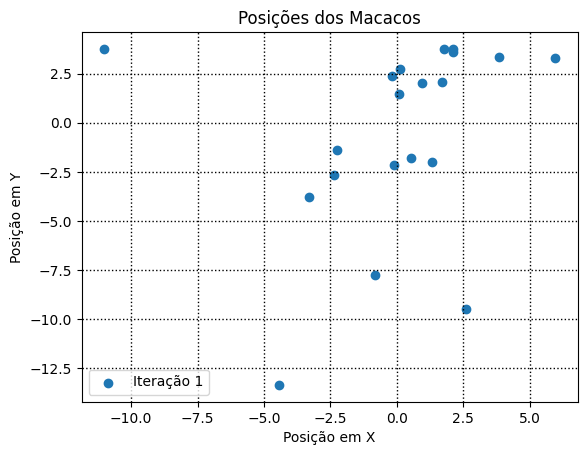

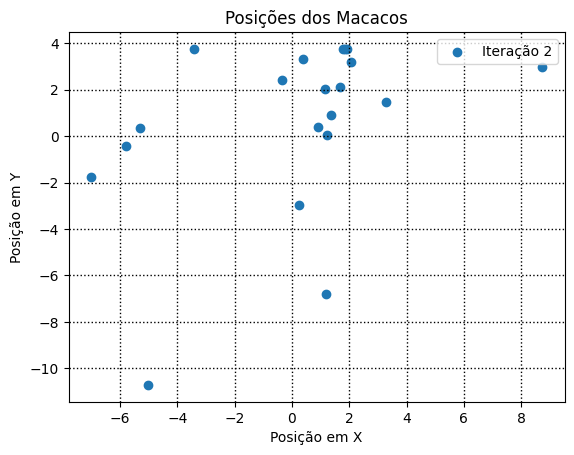

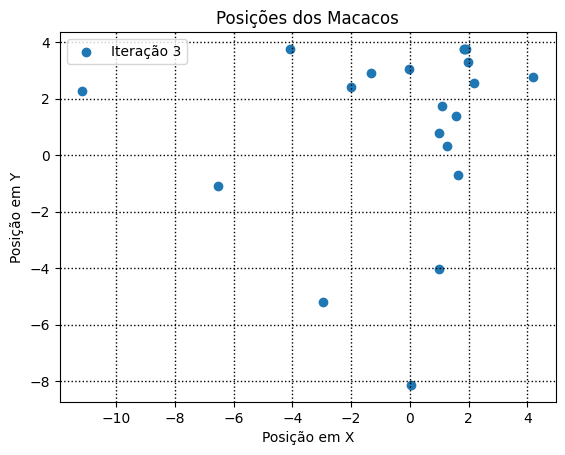

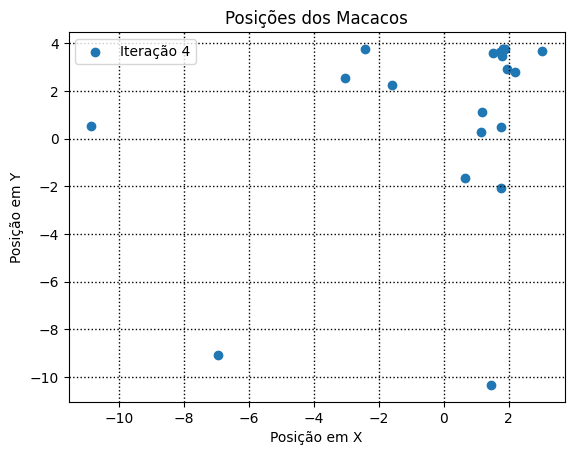

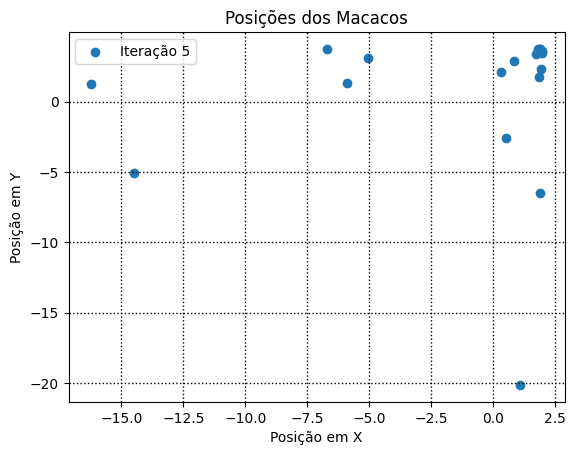

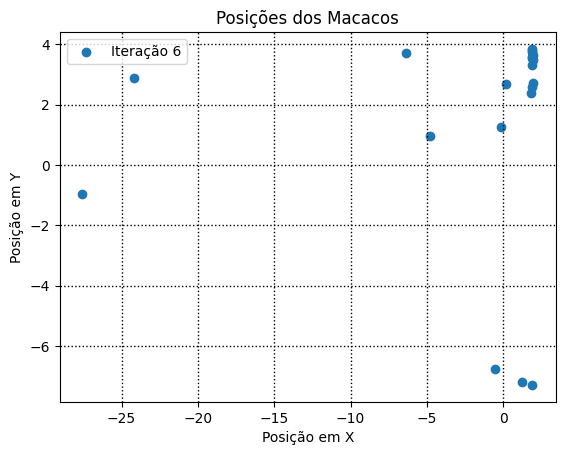

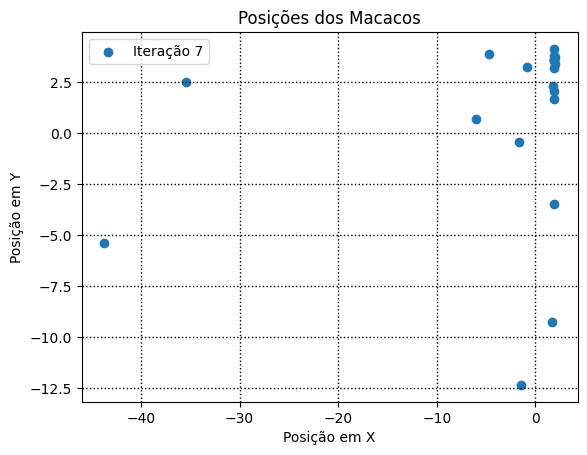

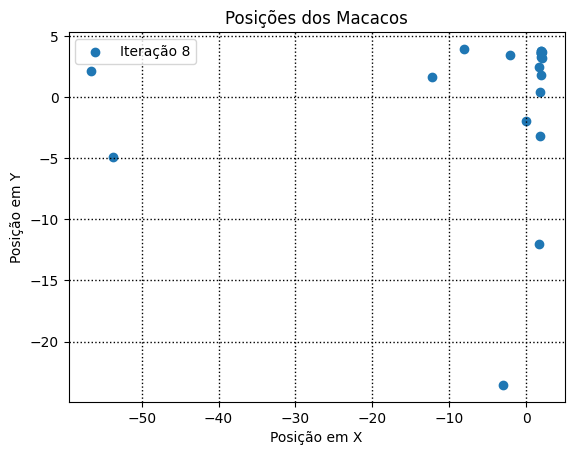

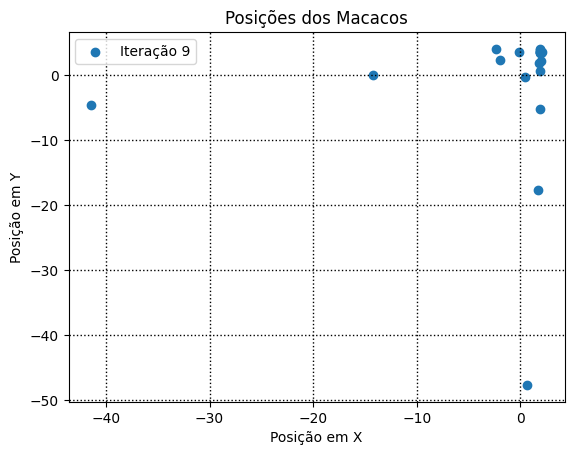

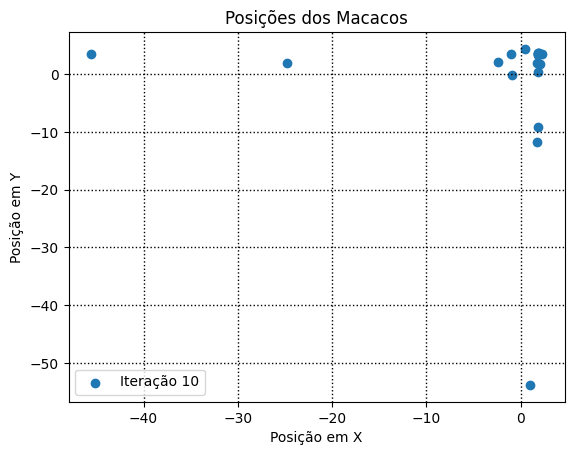

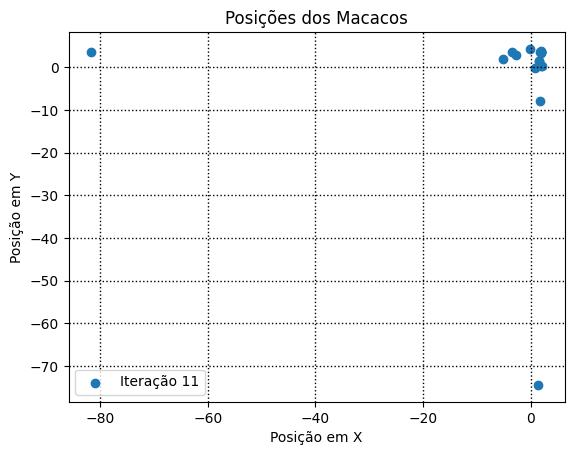

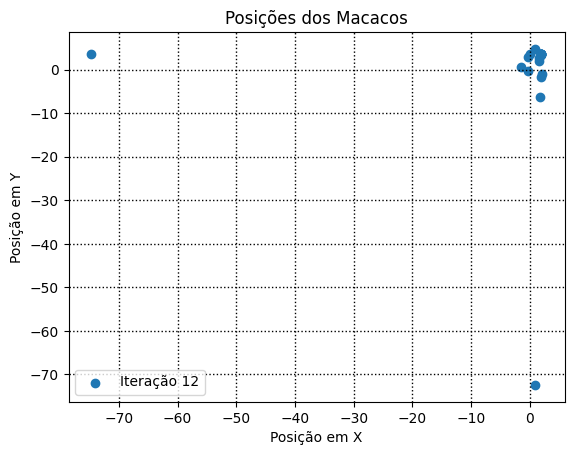

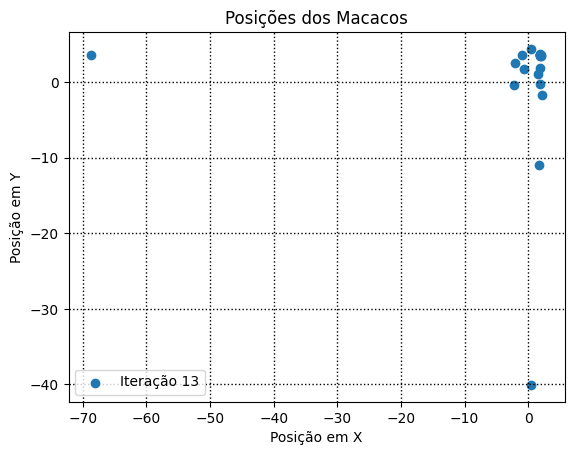

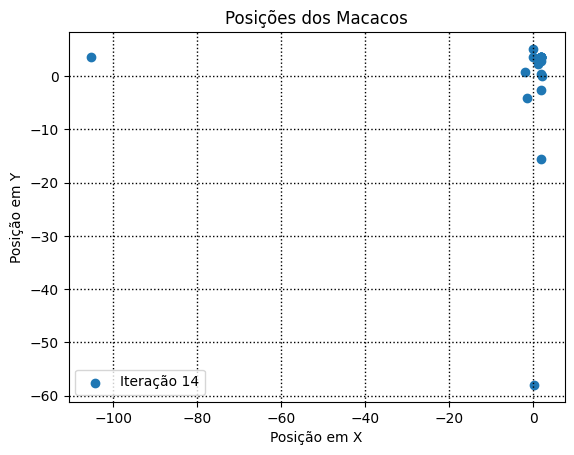

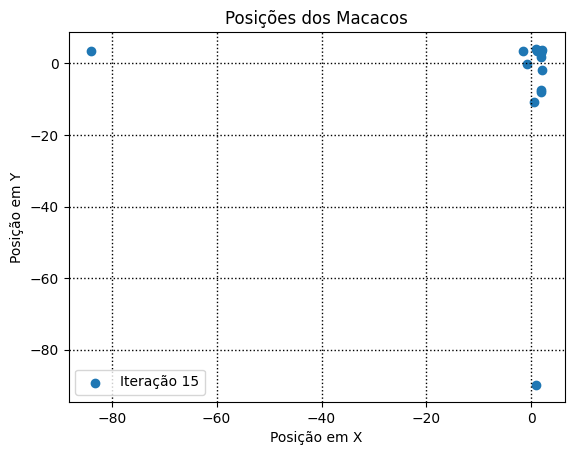

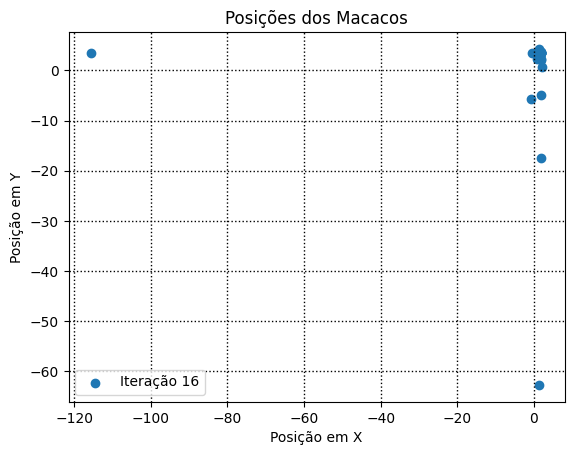

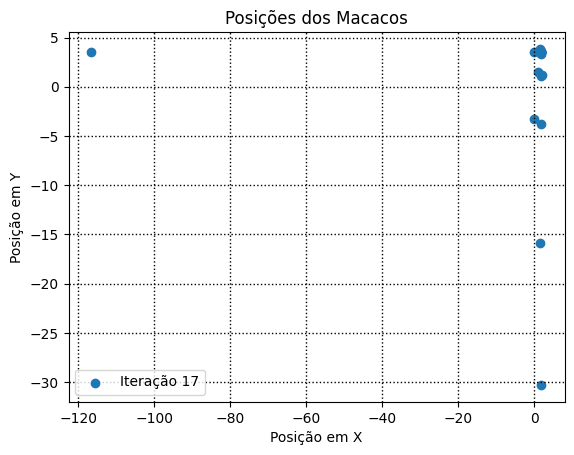

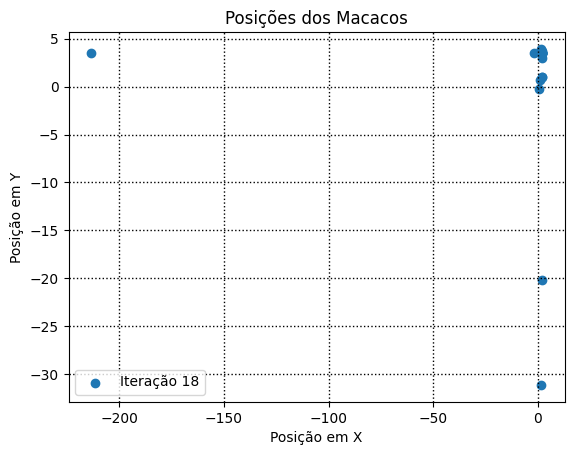

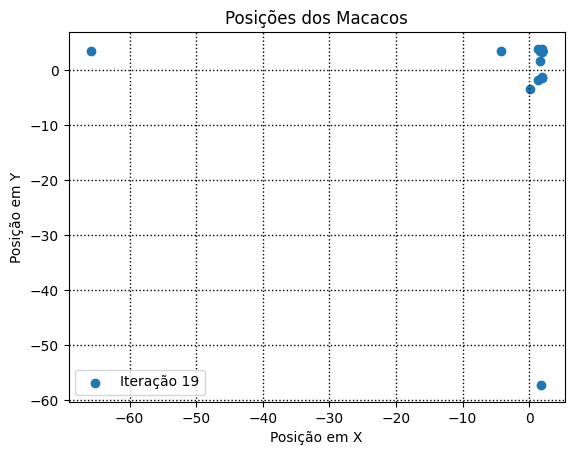

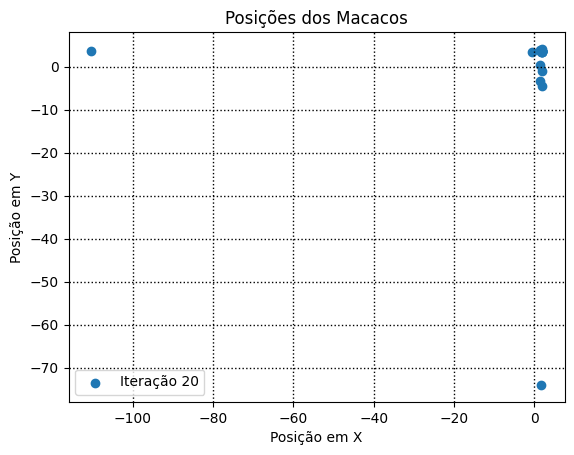

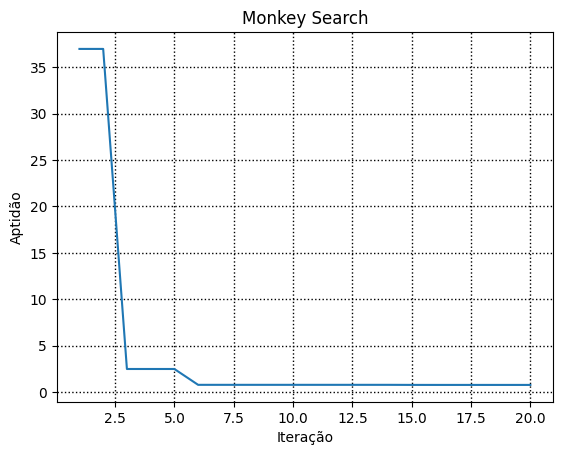

In [7]:
best_values, tempo_gasto = monkey_search(rosenbrock, num_monkeys, num_iterations)

In [8]:
df = pd.DataFrame()

In [9]:
ite = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [10]:
df['Iteração'] = ite
df['Resultados'] = best_values

In [11]:
df

,Iteração,Resultados
0,1,36.968108
1,2,36.968108
2,3,2.498396
3,4,2.498396
4,5,2.498396
5,6,0.792317
6,7,0.792317
7,8,0.792317
8,9,0.792317
9,10,0.792317


In [12]:
print(tempo_gasto)

6.547651767730713
